# Bike Speed versus Grade

Like most people, I bike slower when I'm going up a steep hill than on a flat road. But how much slower?
To answer that, I downloaded data on my past rides 
from [Strava](https://www.strava.com/athletes/575579) and manipulated the `data` to create two lists: 

- `X`: the *grade* of each ride, in feet of ascent per mile. 
- `Y`: the *speed* of each (corresponding) ride, in miles per hour.

I omit rides shorter than 30 miles, because on some short rides I was sprinting at an unsustainable speed, and on others I was slowed by city traffic. Here is the code to collect and plot the X:Y data:

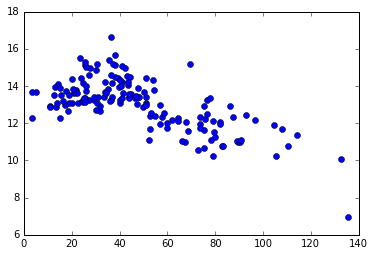

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv

def hours(sec):    return float(sec) / 60 / 60
def feet(meters):  return float(meters) * 100 / 2.54 / 12
def miles(meters): return feet(meters) / 5280

# Read data file with three fields: distance (m), climb (m), elapsed time (sec)
X, Y = [], []
for (dist, climb, time) in csv.reader(open('dist-climb-time.csv')):
    if miles(dist) > 30:
        X.append(feet(climb) / miles(dist))
        Y.append(miles(dist) / hours(time))

plt.plot(X, Y, 'o');

As expected, the speeds get slower as the grade gets steeper. The data has a lot of variance, and I can say that it 
looks more like a curve than a straight line, so I'll fit a cubic (degree two) polynomial to the data,
and make the plot prettier:

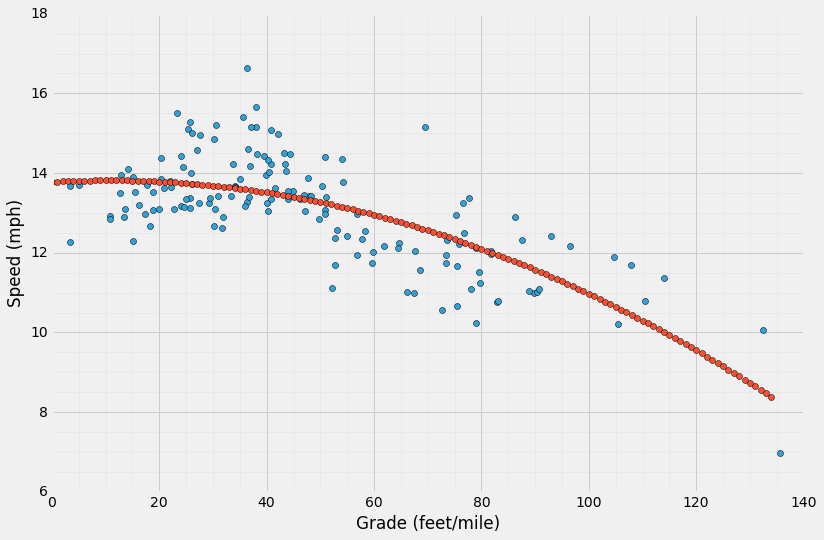

In [4]:
def poly(X, Y, n):
    "Best-fit degree-n polynomial for X, Y data."
    C = np.polyfit(X, Y, n)[::-1] # Array of coefficients, reversed
    return lambda x: sum(C[i] * x ** i for i in range(n + 1))  

F = poly(X, Y, 2) # defines y = F(x); x in ft/mile, y in mph

def show(X, Y, F=F): 
    plt.rcParams["figure.figsize"] = (12, 8)
    plt.style.use('fivethirtyeight')
    plt.plot(X, Y, 'o')
    X1 = list(range(int(max(X))))
    plt.plot(X1, [F(x) for x in X1], 'o')
    plt.ylabel('Speed (mph)')
    plt.xlabel('Grade (feet/mile)')
    plt.minorticks_on()
    plt.grid(True, which='major')
    plt.grid(True, which='minor', alpha=0.2)
             
show(X, Y)     

So, I average about 14 mph when the road is fairly flat, with a lot of variability from 12 to 16 mph, depending more on my level of effort than on the grade of the road. But from 60 ft/mile and up, speed falls off quickly at 1 mph for every 20 ft/mile, and by 140 ft/mile, I'm down around 8 mph. Note that 140 ft/mile is only 2.7% grade, but if you figure a typical route is 1/3 up, 1/3 down, and 1/3 flatish, then that's 8% grade on the up part.

I can use the polynomial `F` to estimate the duration of a route:

In [3]:
def duration(dist, climb, F=F):
    "Given a distance in miles and total climb in feet, return estimated time in minutes."
    return dist / F(climb / dist) * 60

For example, to get to  Pescadero from La Honda, I could take the flatter [coast route](https://www.google.com/maps/dir/La+Honda,+California/Pescadero,+California/@37.2905834,-122.3896683,12z/data=!4m19!4m18!1m10!1m1!1s0x808faed4dc6265bd:0x51a109d3306a7219!2m2!1d-122.274227!2d37.3190255!3m4!1m2!1d-122.4039496!2d37.3116594!3s0x808f062b7d7585e7:0x942480c22f110b74!1m5!1m1!1s0x808f00b4b613c4c1:0x43c609077878b77!2m2!1d-122.3830152!2d37.2551636!3e1), or the shorter [creek route](https://www.google.com/maps/dir/La+Honda,+California/Pescadero,+California/@37.2905834,-122.3896683,12z/data=!4m19!4m18!1m10!1m1!1s0x808faed4dc6265bd:0x51a109d3306a7219!2m2!1d-122.274227!2d37.3190255!3m4!1m2!1d-122.3658887!2d37.2538867!3s0x808f00acf265bd43:0xb7e2a0c9ee355c3a!1m5!1m1!1s0x808f00b4b613c4c1:0x43c609077878b77!2m2!1d-122.3830152!2d37.2551636!3e1):

In [4]:
coast = duration(15.7, 344)
creek = duration(13.5, 735)

coast - creek

6.7314081227852185

This says the coast route takes 6.7 minutes longer. Good to know, but other factors are probably more important in making the choice.